<a href="https://colab.research.google.com/github/Akhalfstar/classification-of-chest-X-ray-/blob/main/DS_MARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prashant268/chest-xray-covid19-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.06G/2.06G [00:26<00:00, 83.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prashant268/chest-xray-covid19-pneumonia/versions/2


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/tuberculosis-tb-chest-xray-dataset")

print("Path to dataset files:", path)

100%|██████████| 663M/663M [00:10<00:00, 64.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/versions/3


In [ ]:
# Paths to data
data_dir = "/root/.cache/kagglehub/datasets/prashant268/chest-xray-covid19-pneumonia/versions/2/Data/train"  # Replace with your dataset path

# Hyperparameters
image_size = (150, 150)
batch_size = 32
epochs = 30


In [ ]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom-in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Split dataset into training and validation sets
)

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Map class indices to class labels
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Count the number of images per class in the training set
train_class_counts = {class_name: list(train_generator.classes).count(idx)
                      for class_name, idx in train_generator.class_indices.items()}
print("Training Class Counts:", train_class_counts)

# Count the number of images per class in the validation set
validation_class_counts = {class_name: list(validation_generator.classes).count(idx)
                           for class_name, idx in validation_generator.class_indices.items()}
print("Validation Class Counts:", validation_class_counts)


Found 4676 images belonging to 4 classes.
Found 1168 images belonging to 4 classes.
Class Indices: {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'Tuberculosis': 3}
Training Class Counts: {'COVID19': 368, 'NORMAL': 1013, 'PNEUMONIA': 2735, 'Tuberculosis': 560}
Validation Class Counts: {'COVID19': 92, 'NORMAL': 253, 'PNEUMONIA': 683, 'Tuberculosis': 140}


In [ ]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model checkpoint to save the best model
checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.5765 - loss: 1.1611
Epoch 1: val_accuracy improved from -inf to 0.61387, saving model to best_model.keras
147/147 ━━━━━━━━━━━━━━━━━━━━ 132s 823ms/step - accuracy: 0.5770 - loss: 1.1585 - val_accuracy: 0.6139 - val_loss: 0.8323
Epoch 2/30
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6830 - loss: 0.7372
Epoch 2: val_accuracy improved from 0.61387 to 0.74658, saving model to best_model.keras
147/147 ━━━━━━━━━━━━━━━━━━━━ 111s 648ms/step - accuracy: 0.6833 - loss: 0.7368 - val_accuracy: 0.7466 - val_loss: 0.6614
Epoch 3/30
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.7473 - loss: 0.6425
Epoch 3: val_accuracy did not improve from 0.74658
147/147 ━━━━━━━━━━━━━━━━━━━━ 98s 641ms/step - accuracy: 0.7472 - loss: 0.6429 - val_accuracy: 0.6447 - val_loss: 0.7682
Epoch 4/30
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.7402 - loss: 0.6449
Epoch 4: val_accuracy improved from 0.74658 to 0.77226, saving model to

In [ ]:
# Evaluate model on validation data
# from tensorflow.keras.models import load_model

# # Correct the path to your uploaded model
# model = load_model('/content/trained_model.keras')

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# model.summary()


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 463ms/step - accuracy: 0.9215 - loss: 0.2241
Validation Loss: 0.23507460951805115
Validation Accuracy: 0.9152397513389587


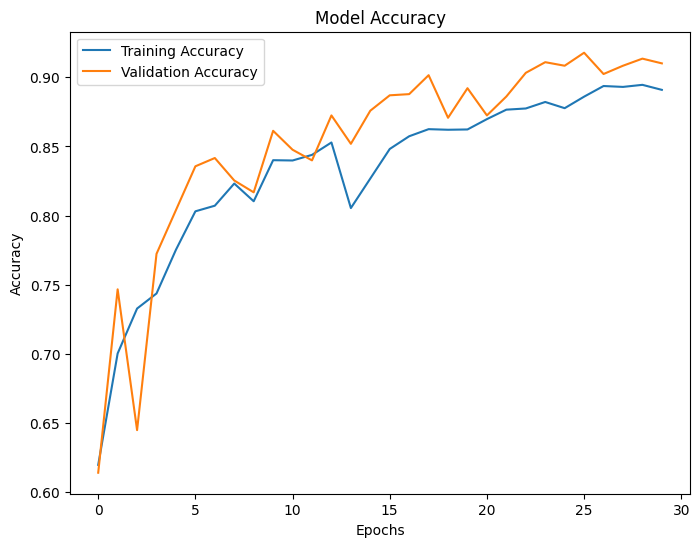

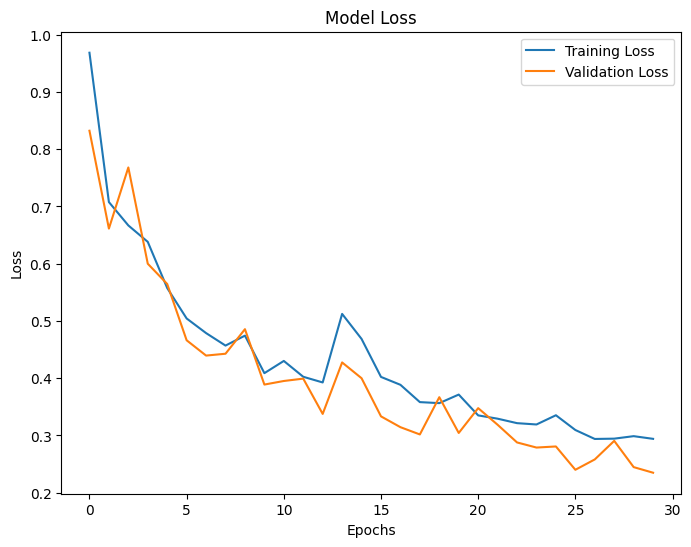

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/trained_model.keras')  # Save in native Keras format
# if os.path.exists('/content/trained_model.keras'):
#     print("Model saved at: /content/trained_model.keras")
# else:
#     print("Model not found.")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class], predictions

# Example prediction
test_image_path = "/root/.cache/kagglehub/datasets/prashant268/chest-xray-covid19-pneumonia/versions/2/Data/test/PNEUMONIA/PNEUMONIA(3420).jpg"  # Replace with the path to your test image
predicted_label, prediction_probs = predict_image(test_image_path, model, class_indices)
print(f"Predicted Class: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probs}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
Predicted Class: PNEUMONIA
Prediction Probabilities: [[5.8577557e-06 2.4875955e-04 9.9974519e-01 2.2429153e-07]]


In [ ]:
# Get predictions for the validation data
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels for the validation data
y_true = validation_generator.classes



37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step


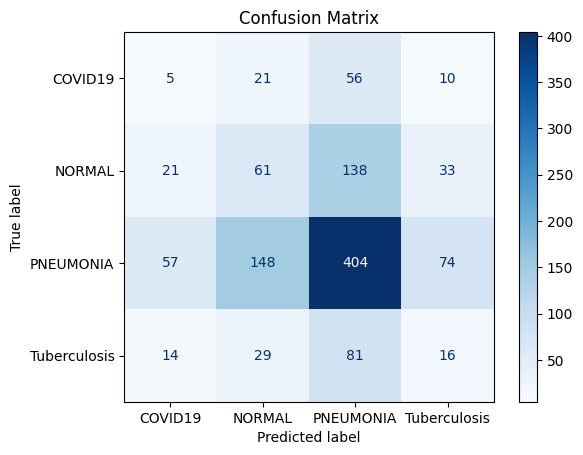

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Evaluate model on validation data
from tensorflow.keras.models import load_model

# Correct the path to your uploaded model
model = load_model('/content/trained_model.keras')

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9134 - loss: 0.2504
Validation Loss: 0.26760417222976685
Validation Accuracy: 0.9049657583236694


In [ ]:
# Get predictions for the validation data
import numpy as np
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels for the validation data
y_true = validation_generator.classes



37/37 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step


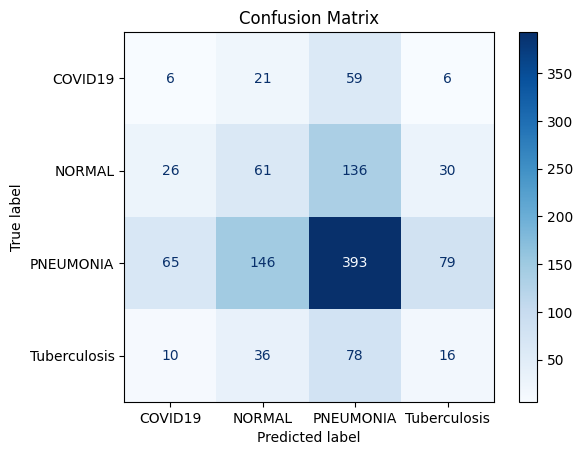

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()